<a href="https://colab.research.google.com/github/shekar2012sri/shekar2012sri/blob/main/only_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [103]:
# import modules required for the segmentation
import os
import sys

# libraries for processing, analysis and loading
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# clustering algorithms
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, MeanShift, estimate_bandwidth, SpectralClustering
from sklearn.cluster import AgglomerativeClustering, MiniBatchKMeans
from sklearn.preprocessing import MinMaxScaler , RobustScaler , StandardScaler, LabelEncoder

import warnings
warnings.filterwarnings("ignore")

In [104]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [105]:
# read the data
df = pd.read_csv("/content/drive/MyDrive/bank_transactions.csv")

In [106]:
# check the shape of the df
df.shape

(1048567, 9)

In [107]:
# information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1048567 non-null  object 
 1   CustomerID               1048567 non-null  object 
 2   CustomerDOB              1045170 non-null  object 
 3   CustGender               1047467 non-null  object 
 4   CustLocation             1048416 non-null  object 
 5   CustAccountBalance       1046198 non-null  float64
 6   TransactionDate          1048567 non-null  object 
 7   TransactionTime          1048567 non-null  int64  
 8   TransactionAmount (INR)  1048567 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 72.0+ MB


In [108]:
# sample head
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5


In [109]:
# sample randomly picked
df.sample(6)

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
335532,T335533,C3539644,9/8/90,M,RAJAHMUNDRY,19402.23,15/8/16,161256,1200.0
418926,T418927,C1422470,2/2/94,M,CHENNAI,12582.04,17/8/16,81213,50.0
805750,T805751,C8711227,9/11/64,F,DELHI,15428.44,5/9/16,184045,275.0
897404,T897405,C3123437,25/3/92,M,MOHALI,6786.39,7/9/16,112633,155.0
476629,T476630,C4856562,9/8/84,M,HYDERABAD,8829.27,21/8/16,195444,599.0
560072,T560073,C3529056,3/10/91,M,GURGAON,32482.29,22/8/16,143032,799.0


In [110]:
# check presence of nulls
df.isna().sum()

TransactionID                 0
CustomerID                    0
CustomerDOB                3397
CustGender                 1100
CustLocation                151
CustAccountBalance         2369
TransactionDate               0
TransactionTime               0
TransactionAmount (INR)       0
dtype: int64

In [111]:
# percentage nulls
df.isna().sum()/df.shape[0]

TransactionID              0.000000
CustomerID                 0.000000
CustomerDOB                0.003240
CustGender                 0.001049
CustLocation               0.000144
CustAccountBalance         0.002259
TransactionDate            0.000000
TransactionTime            0.000000
TransactionAmount (INR)    0.000000
dtype: float64

In [112]:
# drop all nulls since they account for less than 1% of the total records
# Also for columns like customerAccountBalance should not be nulls, the nulls might be unrecorded values
print(f"There are  {df.shape[0]} records before dropping nulls")

# drop them
df.dropna(inplace=True)

print(f"There are  {df.shape[0]} records after dropping nulls")

There are  1048567 records before dropping nulls
There are  1041614 records after dropping nulls


In [113]:
df.isna().sum()

TransactionID              0
CustomerID                 0
CustomerDOB                0
CustGender                 0
CustLocation               0
CustAccountBalance         0
TransactionDate            0
TransactionTime            0
TransactionAmount (INR)    0
dtype: int64

In [114]:
# check if there is a customer with less than zero balance (Backruptcy)
df[df['CustAccountBalance']<0]

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)


In [115]:
# check if there is a customer who transacted with negative values, they might be outliers
df[df['TransactionAmount (INR)']<0]

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)


In [116]:
# check if there is duplicated
df[df.duplicated()]

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)


In [117]:
# summary starts of numnerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustAccountBalance,1041614.0,114998.605283,846760.940316,0.0,4728.14,16768.52,57428.85,1.150355e+08
TransactionTime,1041614.0,157122.116378,51263.516076,0.0,124041.00,164247.00,200022.00,2.359590e+05
TransactionAmount (INR),1041614.0,1566.096079,6561.464373,0.0,160.00,457.50,1200.00,1.560035e+06


In [118]:
# columns
df.columns

Index(['TransactionID', 'CustomerID', 'CustomerDOB', 'CustGender',
       'CustLocation', 'CustAccountBalance', 'TransactionDate',
       'TransactionTime', 'TransactionAmount (INR)'],
      dtype='object')

In [119]:
# drop customer and transaction IDS since there are not of much importance to the task

df.drop(columns=['TransactionID', "CustomerID"], inplace =True)

df.columns

Index(['CustomerDOB', 'CustGender', 'CustLocation', 'CustAccountBalance',
       'TransactionDate', 'TransactionTime', 'TransactionAmount (INR)'],
      dtype='object')

In [120]:
# remove T in gender
df = df[~(df['CustGender'] =="T")]

In [121]:
df.CustGender.value_counts(normalize=True, )

M    0.730577
F    0.269423
Name: CustGender, dtype: float64

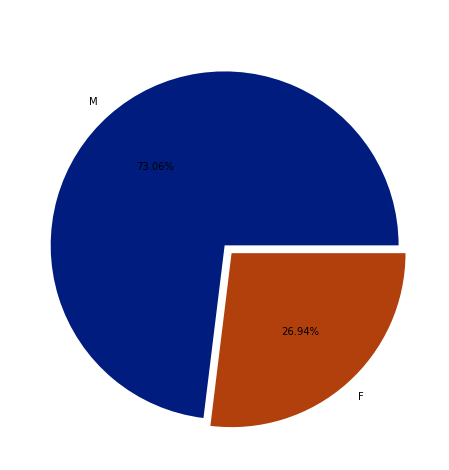

In [122]:
# get the gender data
gender_data = df.CustGender.value_counts(normalize=False, )
#plot the graph of piechart
plt.figure(figsize=(10,8))
plt.pie(
    gender_data.values, labels=gender_data.keys(),
    colors=sns.color_palette("dark"),
    autopct='%.2f%%', explode =(0,0.06)
)
plt.title("Male vs Female distribution comparison", fontsize=19, c='w')
plt.show()

In [123]:
df.groupby("CustGender").mean()[['TransactionAmount (INR)', 'TransactionTime', 'CustAccountBalance']]

,TransactionAmount (INR),TransactionTime,CustAccountBalance
CustGender,,,
F,1643.958457,159708.341586,109578.913540
M,1537.341185,156168.345152,116997.375472


In [124]:
df.groupby("CustGender").max()[['TransactionAmount (INR)', 'TransactionTime', 'CustAccountBalance']]

,TransactionAmount (INR),TransactionTime,CustAccountBalance
CustGender,,,
F,1380002.88,235957,82244629.9
M,1560034.99,235959,115035495.1


In [125]:
df.groupby("CustGender").min()[['TransactionAmount (INR)', 'TransactionTime', 'CustAccountBalance']]

,TransactionAmount (INR),TransactionTime,CustAccountBalance
CustGender,,,
F,0.0,0,0.0
M,0.0,0,0.0


In [126]:
df.groupby("CustGender").sum()[['TransactionAmount (INR)', 'TransactionTime', 'CustAccountBalance']]

,TransactionAmount (INR),TransactionTime,CustAccountBalance
CustGender,,,
F,4.613523e+08,44819750441,3.075168e+10
M,1.169883e+09,118840674957,8.903243e+10


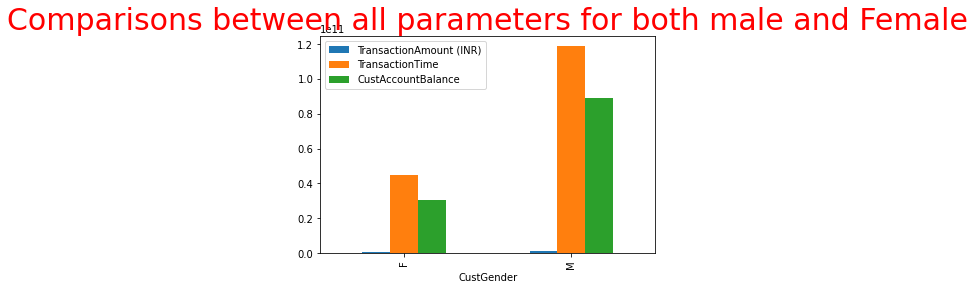

In [127]:
df.groupby("CustGender").sum()[['TransactionAmount (INR)', 'TransactionTime', 'CustAccountBalance']].plot(kind='bar')
plt.title("Comparisons between all parameters for both male and Female", fontsize=30,c='r')
plt.show()

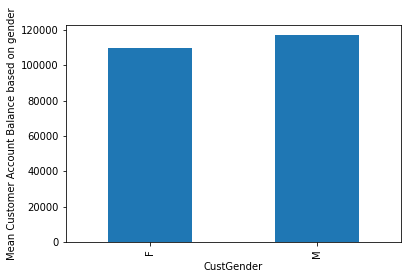

In [128]:
# account balance based on gender
df.groupby('CustGender')['CustAccountBalance'].mean().plot(kind='bar')
plt.ylabel('Mean Customer Account Balance based on gender');

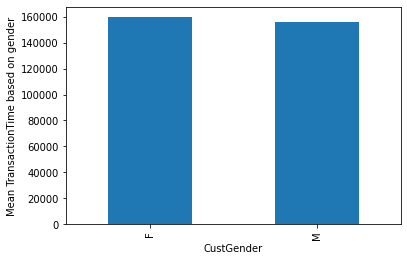

In [129]:
# TransactionTime
df.groupby('CustGender')['TransactionTime'].mean().plot(kind='bar')
plt.ylabel('Mean TransactionTime based on gender');

In [130]:
df.columns

Index(['CustomerDOB', 'CustGender', 'CustLocation', 'CustAccountBalance',
       'TransactionDate', 'TransactionTime', 'TransactionAmount (INR)'],
      dtype='object')

In [131]:
# columns with date
date_cols =["TransactionDate", "CustomerDOB"]

In [132]:
# date of birth
df.CustomerDOB.value_counts().sort_values(ascending=False)

1/1/1800    56291
1/1/89        809
1/1/90        784
6/8/91        698
1/1/91        665
            ...  
17/1/59         1
15/4/41         1
4/8/34          1
6/9/71          1
24/10/44        1
Name: CustomerDOB, Length: 17233, dtype: int64

In [133]:
df.TransactionDate.value_counts()

7/8/16      27084
13/8/16     26738
4/9/16      26420
6/8/16      26416
3/9/16      26292
10/9/16     25627
14/8/16     25407
11/9/16     25355
15/8/16     24020
21/8/16     22833
2/9/16      22718
12/8/16     22277
1/9/16      22179
11/8/16     21674
9/8/16      21673
8/9/16      21648
10/8/16     21457
9/9/16      21444
27/8/16     21349
20/8/16     21188
5/9/16      21116
7/9/16      20999
17/8/16     20960
5/8/16      20949
28/8/16     20944
8/8/16      20883
2/8/16      20787
12/9/16     20611
4/8/16      20535
13/9/16     20506
3/8/16      20446
16/8/16     20278
1/8/16      20277
14/9/16     19845
15/9/16     19610
31/8/16     19586
6/9/16      19510
18/8/16     19338
19/8/16     18559
22/8/16     18441
25/8/16     18424
24/8/16     17893
26/8/16     17615
30/8/16     17273
23/8/16     17239
29/8/16     16700
18/9/16     14622
26/9/16     12376
25/9/16      8127
27/9/16      7401
22/9/16      6925
21/10/16     3641
23/9/16      3460
30/9/16      1935
16/10/16        3
Name: Tran

In [134]:
# convert these columns to datetime
df['CustomerDOB'] =pd.to_datetime(df.CustomerDOB)
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])

In [135]:
from datetime import date
date.today()

datetime.date(2023, 1, 2)

In [136]:
# get the possible the age in years of the customer at the time of todata

def get_cust_age(DOB):
    """
    get the year in which the customer was born
    """
    return date.today().year - DOB.year - ((date.today().month, date.today().day) < (DOB.month, DOB.day))

# apply the function and call it Age
df['Age'] = df.CustomerDOB.apply(get_cust_age)

In [137]:
# check ages that are less than 16((Adult age where one can own an account).
# AN assumption is made that those with less than 16 years cannot own an account
df[df.Age >16]

,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age
0,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,143207,25.0,28
2,1996-11-26,F,MUMBAI,17874.44,2016-02-08,142712,459.0,26
3,1973-09-14,F,MUMBAI,866503.21,2016-02-08,142714,2060.0,49
4,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,181156,1762.5,34
6,1992-01-26,F,MUMBAI,973.46,2016-02-08,173806,566.0,30
...,...,...,...,...,...,...,...,...
1048562,1990-08-04,M,NEW DELHI,7635.19,2016-09-18,184824,799.0,32
1048563,1992-02-20,M,NASHIK,27311.42,2016-09-18,183734,460.0,30
1048564,1989-05-18,M,HYDERABAD,221757.06,2016-09-18,183313,770.0,33
1048565,1978-08-30,M,VISAKHAPATNAM,10117.87,2016-09-18,184706,1000.0,44


In [138]:
df = df[df.Age>16]
df.head()

,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age
0,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,143207,25.0,28
2,1996-11-26,F,MUMBAI,17874.44,2016-02-08,142712,459.0,26
3,1973-09-14,F,MUMBAI,866503.21,2016-02-08,142714,2060.0,49
4,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,181156,1762.5,34
6,1992-01-26,F,MUMBAI,973.46,2016-02-08,173806,566.0,30


In [139]:
# extract date meta data. They will help in modelling

df['TransMonth'] = df.TransactionDate.dt.month
df['TransactionDay'] = df.TransactionDate.dt.day
df['TransWeekDay'] = df.TransactionDate.dt.dayofweek
df['TransYearDay'] = df.TransactionDate.dt.dayofyear
df['TransYear']  = df.TransactionDate.dt.year

In [140]:
# transaction hour from trasaction time.
from datetime import datetime
df["TransHour"] = [int(datetime.fromtimestamp(i).strftime("%H")) for i in df.TransactionTime.values]

In [141]:
df.head()

,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age,TransMonth,TransactionDay,TransWeekDay,TransYearDay,TransYear,TransHour
0,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,143207,25.0,28,2,8,0,39,2016,15
2,1996-11-26,F,MUMBAI,17874.44,2016-02-08,142712,459.0,26,2,8,0,39,2016,15
3,1973-09-14,F,MUMBAI,866503.21,2016-02-08,142714,2060.0,49,2,8,0,39,2016,15
4,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,181156,1762.5,34,2,8,0,39,2016,2
6,1992-01-26,F,MUMBAI,973.46,2016-02-08,173806,566.0,30,2,8,0,39,2016,0


In [142]:
# all months
all_months =['Jan',"Feb","March","April","May","June","July","Aug","sept","Oct","Nov","Dec"]
month_df =df.groupby(["TransMonth", "CustGender"]).mean().reset_index()

<Figure size 1080x864 with 0 Axes>

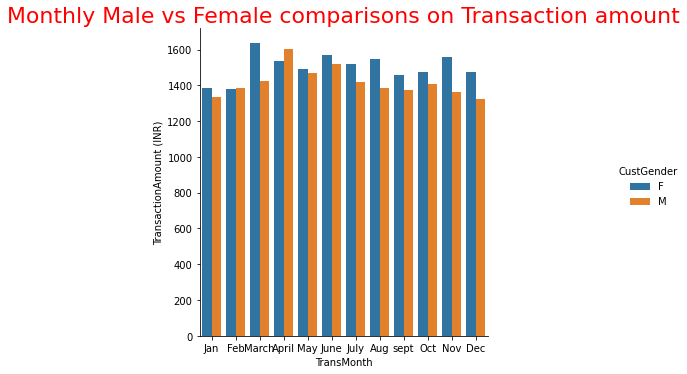

In [143]:
# view the transaction as for each month comparison
plt.figure(figsize=(15,12))
g = sns.catplot(
    data = month_df,
    y='TransactionAmount (INR)',
    kind='bar',
    x="TransMonth",
    hue='CustGender')
plt.title('Monthly Male vs Female comparisons on Transaction amount',fontsize=22,c='r');

g.set_xticklabels(all_months)

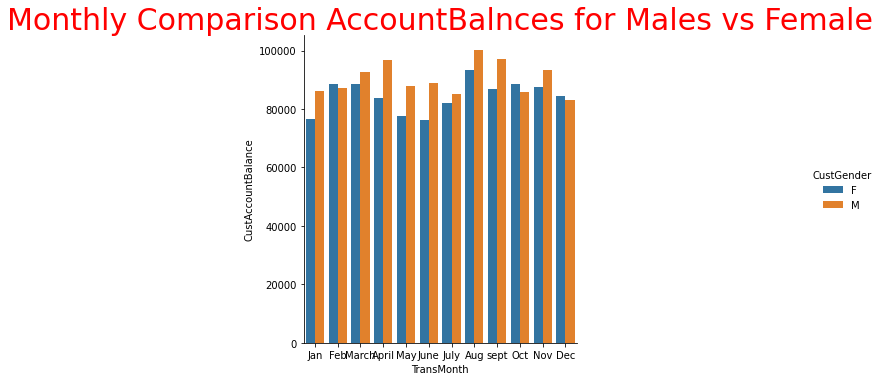

In [144]:
g = sns.catplot(
    data = month_df,
    y='CustAccountBalance',
    kind='bar',
    x="TransMonth",
    hue='CustGender')
plt.title('Monthly Comparison AccountBalnces for Males vs Female',fontsize=30,c='r');

g.set_xticklabels(all_months)

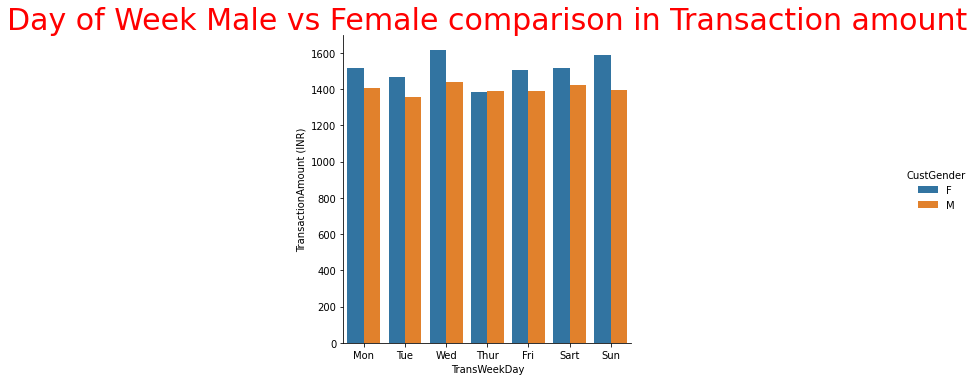

In [145]:
# by week
day_df =df.groupby(["TransWeekDay", "CustGender"]).mean().reset_index()
g = sns.catplot(data=day_df,
            x='TransWeekDay',
            y='TransactionAmount (INR)',
            kind='bar',
            hue='CustGender')
plt.title('Day of Week Male vs Female comparison in Transaction amount',color='r', fontsize=30);
g.set_xticklabels(["Mon", "Tue", "Wed", "Thur","Fri", "Sart", "Sun"])

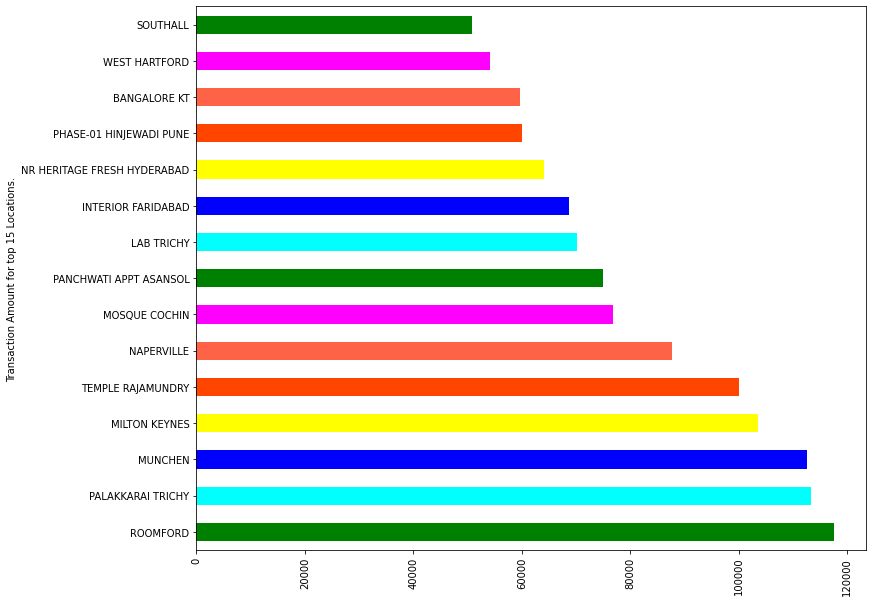

In [146]:
plt.figure(figsize=(12,10))
df.groupby('CustLocation')['TransactionAmount (INR)'].mean().sort_values(
    ascending=False)[:15].plot(
    kind='barh',
    color=['green','cyan','blue','yellow','orangered','tomato','magenta'])
plt.ylabel('Transaction Amount for top 15 Locations.');
plt.xticks(rotation=90)
plt.show()

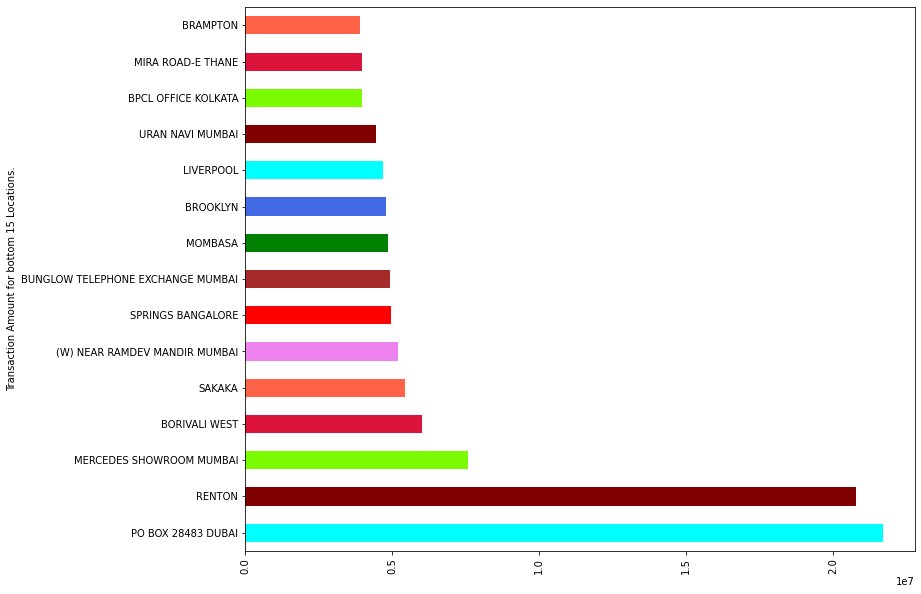

In [147]:
# bottom 10
plt.figure(figsize=(12,10))
df.groupby('CustLocation')['CustAccountBalance'].mean().sort_values(ascending=False)[:15].plot(kind='barh',color=['aqua','maroon','lawngreen','crimson','tomato','violet','red','brown','green','royalblue'])
plt.ylabel('Transaction Amount for bottom 15 Locations.');
plt.xticks(rotation=90)
plt.show()

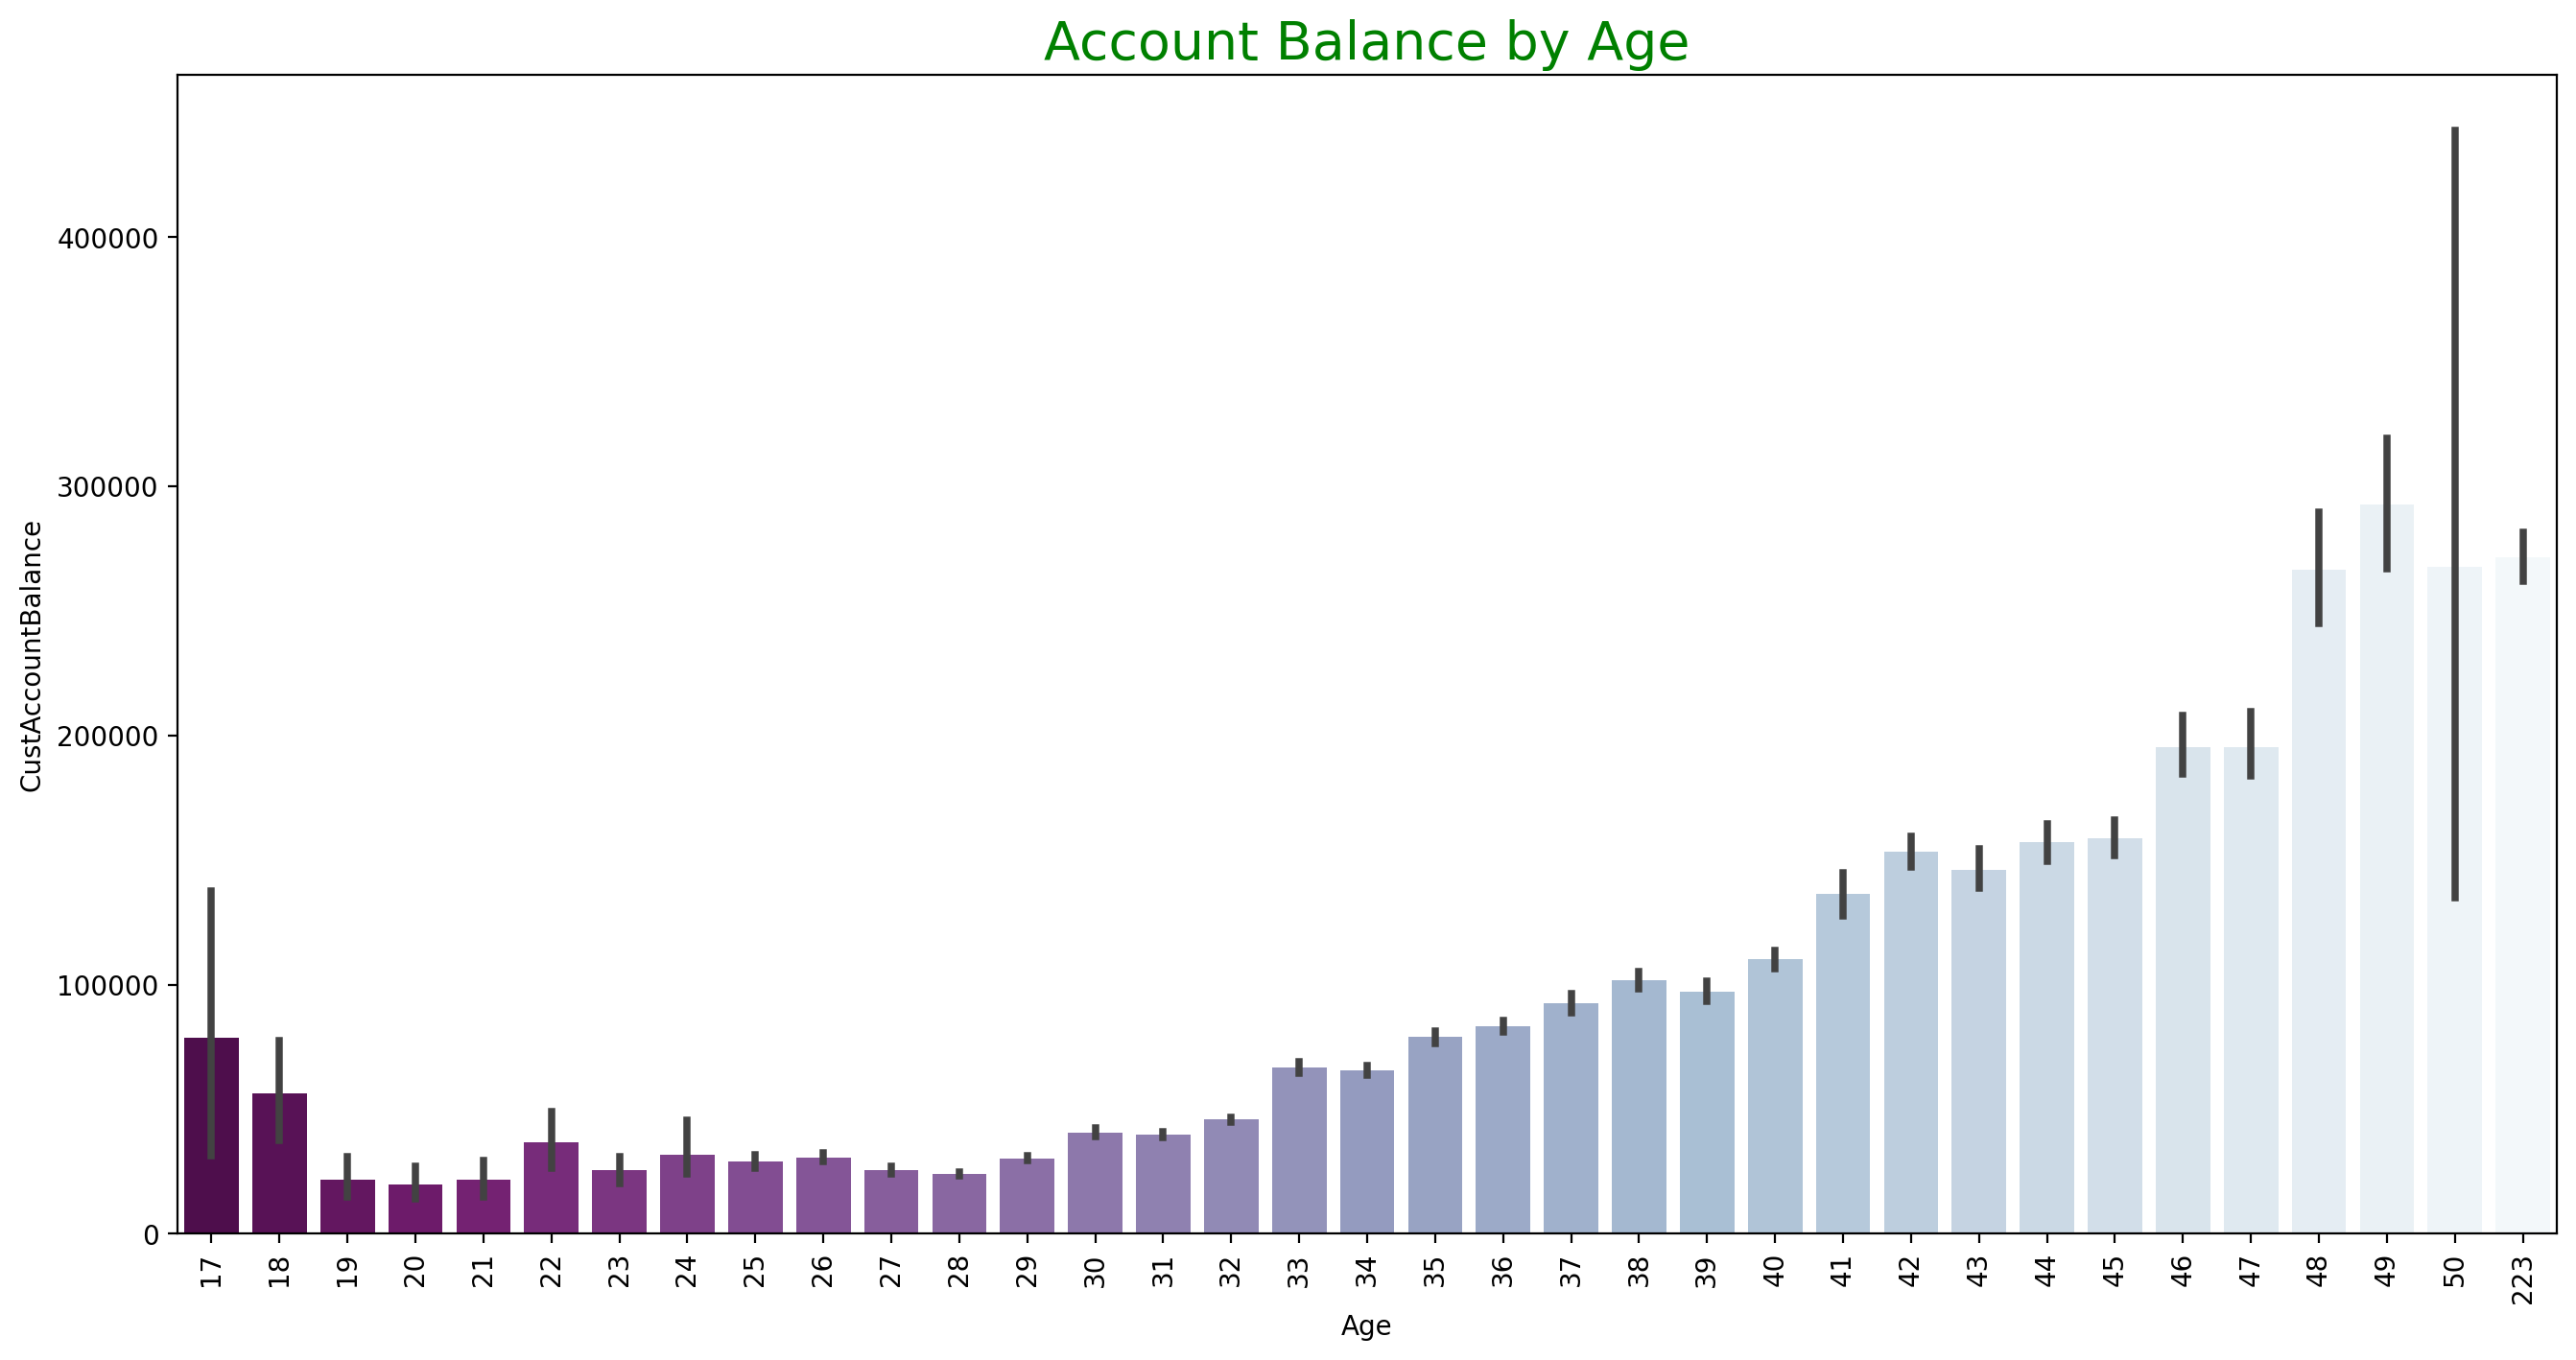

In [148]:
# Che
plt.figure(figsize=(16,8),dpi=200)
sns.barplot(data=df,x='Age',y='CustAccountBalance',palette='BuPu_r')
plt.xticks(rotation=90)
plt.title("Account Balance by Age", fontsize=20, c='g')
plt.show()

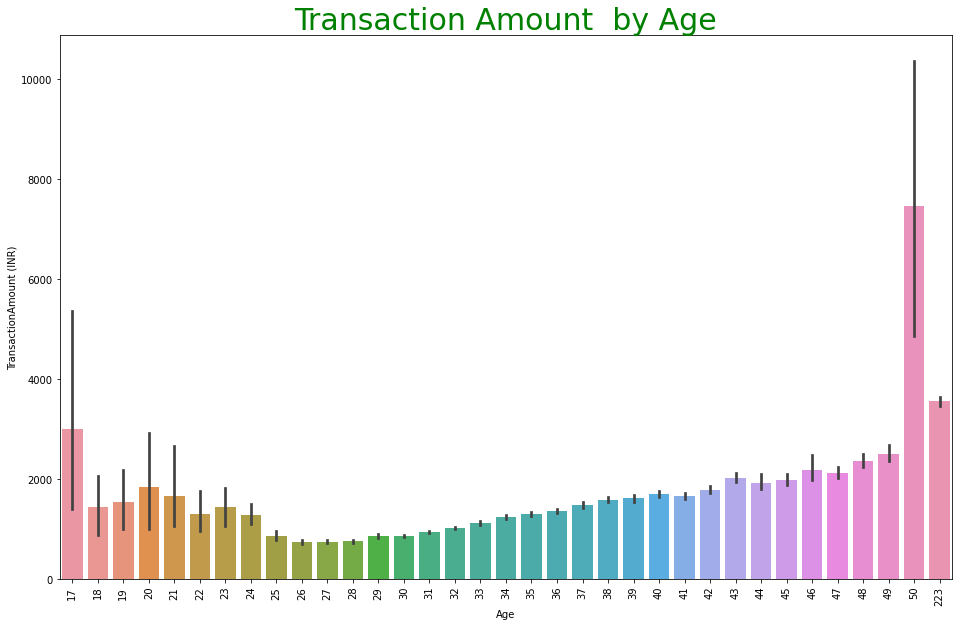

In [149]:
plt.figure(figsize=(16,10))
sns.barplot(data=df,x='Age',y='TransactionAmount (INR)')
plt.title("Transaction Amount  by Age", fontsize=30, c='g')
plt.xticks(rotation=90)
plt.show()

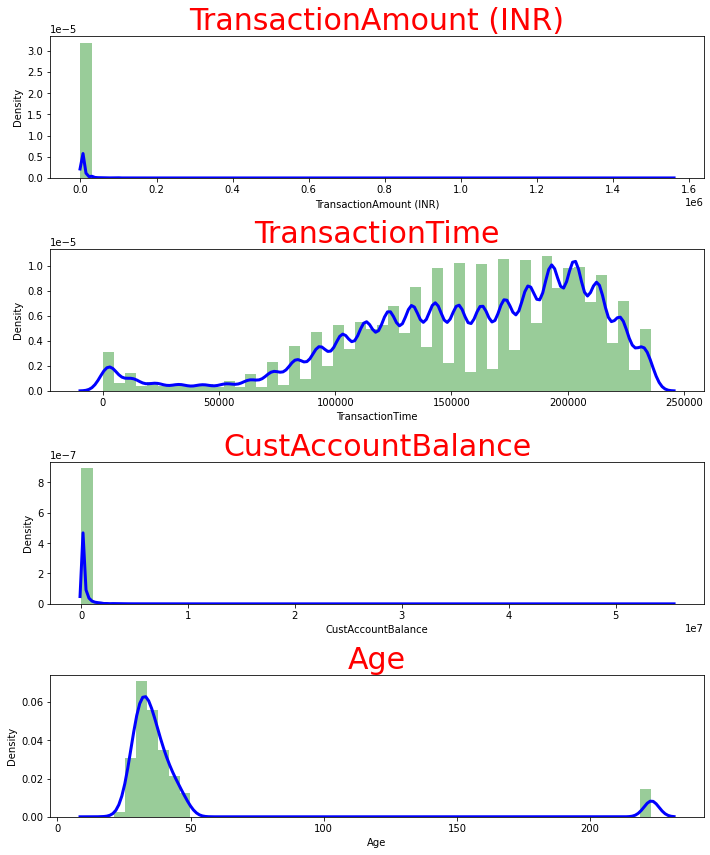

In [150]:
# lets plot KDE plot of numerical features to have some observations
plt.figure(figsize = (10,50))
numerical_cols = ['TransactionAmount (INR)', 'TransactionTime', 'CustAccountBalance', "Age"]
for i in range(len(numerical_cols)):
    plt.subplot(17, 1,  i+1) 
    sns.distplot(df[numerical_cols[i]], kde_kws = {"color": "b", "lw": 3, "label": "KDE"}, hist_kws= {"color":"g"}) 
    
    plt.title(numerical_cols[i], fontsize=30, c='r')     
    
plt.tight_layout()

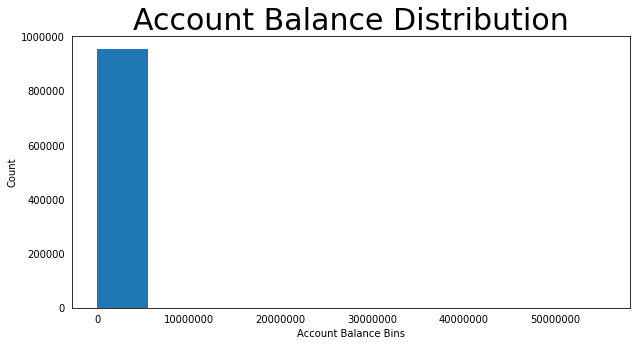

In [151]:
plt.figure(figsize=(10,5))
plt.title("Account Balance Distribution", fontsize=30)
plt.xlabel("Account Balance Bins")
plt.ylabel("Count")
plt.hist(df.CustAccountBalance,bins=10)
plt.tick_params(bottom=False,left=False)
plt.ticklabel_format(style='plain')
plt.show()

In [152]:
df.columns

Index(['CustomerDOB', 'CustGender', 'CustLocation', 'CustAccountBalance',
       'TransactionDate', 'TransactionTime', 'TransactionAmount (INR)', 'Age',
       'TransMonth', 'TransactionDay', 'TransWeekDay', 'TransYearDay',
       'TransYear', 'TransHour'],
      dtype='object')

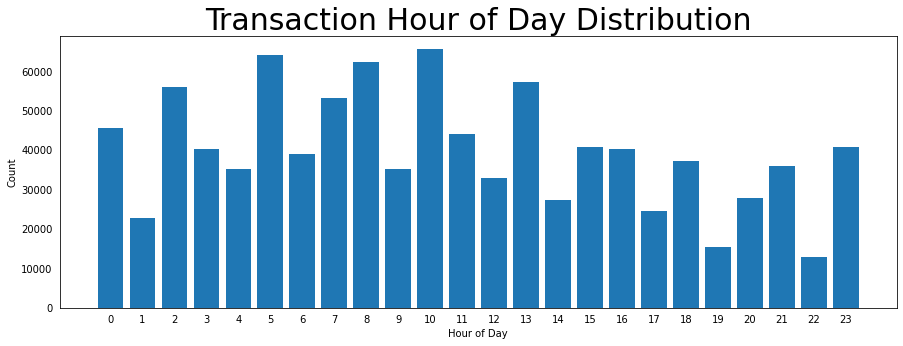

In [153]:
plt.figure(figsize=(15,5))
un, count = np.unique(df.TransHour.values.astype('int32'),return_counts=True)
un, count = zip(*sorted(zip(un, count)))
plt.title("Transaction Hour of Day Distribution", fontsize=30)
plt.xlabel("Hour of Day")
plt.ylabel("Count")
plt.tick_params(bottom=False,left=False)
# sns.barplot(
#     [str(i) for i in un], count
# )
plt.bar([str(i) for i in un], count)
plt.show()

In [154]:
df.head(5)

,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age,TransMonth,TransactionDay,TransWeekDay,TransYearDay,TransYear,TransHour
0,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,143207,25.0,28,2,8,0,39,2016,15
2,1996-11-26,F,MUMBAI,17874.44,2016-02-08,142712,459.0,26,2,8,0,39,2016,15
3,1973-09-14,F,MUMBAI,866503.21,2016-02-08,142714,2060.0,49,2,8,0,39,2016,15
4,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,181156,1762.5,34,2,8,0,39,2016,2
6,1992-01-26,F,MUMBAI,973.46,2016-02-08,173806,566.0,30,2,8,0,39,2016,0


In [155]:
# extract year, month and day from date of birth
df['YearDOB'] = df['CustomerDOB'].dt.year
df['DayDOB']  = df['CustomerDOB'].dt.day
df['MonthDOB'] = df['CustomerDOB'].dt.month

In [156]:
# encode location since it has some information about customer
from sklearn.preprocessing import LabelEncoder
loc_encoder = LabelEncoder()
df['CustLocation'] = loc_encoder.fit_transform(df.CustLocation)

In [157]:
# drop the 3 columns

df.drop(columns=['CustomerDOB',"TransactionDate"], inplace=True)

# recheck the data
df.head()

,CustGender,CustLocation,CustAccountBalance,TransactionTime,TransactionAmount (INR),Age,TransMonth,TransactionDay,TransWeekDay,TransYearDay,TransYear,TransHour,YearDOB,DayDOB,MonthDOB
0,F,3357,17819.05,143207,25.0,28,2,8,0,39,2016,15,1994,1,10
2,F,4927,17874.44,142712,459.0,26,2,8,0,39,2016,15,1996,26,11
3,F,4927,866503.21,142714,2060.0,49,2,8,0,39,2016,15,1973,14,9
4,F,5291,6714.43,181156,1762.5,34,2,8,0,39,2016,2,1988,24,3
6,F,4927,973.46,173806,566.0,30,2,8,0,39,2016,0,1992,26,1


In [158]:
# convert gender values to numerical
df['CustGender'] = np.where(df.CustGender=="M", 1, 0)

In [159]:
# All records with age as placeholder is going to be removed since the analysis phase is done

df_final = df[df['Age']<=100]

In [160]:
# scale the dataset
scaler = StandardScaler()
X = scaler.fit_transform(df_final)

In [161]:
X.shape

(901140, 15)

In [162]:
X = pd.DataFrame(X)

In [163]:
#set seed for productivity of the project
SEED = 2022
def set_random_seed(SEED=SEED):
    import os
    np.random.seed = SEED
    os.environ['PYTHONHASHSEED'] = str(SEED)
    
set_random_seed()

In [164]:
# in order to work well , try reducing the dimension of the data points
# Apply PCA by fitting the data with the same number of dimensions as features


mms = MinMaxScaler()
mms.fit(df)
df1 = mms.transform(df)


n_components = df.shape[1]
pca = PCA(n_components=n_components, random_state=SEED)
pca.fit(df)

#transform the df using the PCA fit above
pca_df = pca.transform(df)


In [165]:
df.shape

(957431, 15)

In [166]:
# get variance/data representability of each of the component
for i in range(n_components):
    first_n = pca.explained_variance_ratio_[0:i+1].sum()*100
    print(f'Percent variance explained by first {i+1} components: {round(first_n , 4)}%')# get variance/data representability of each of the component
for i in range(n_components):
    first_n = pca.explained_variance_ratio_[0:i+1].sum()*100
    print(f'Percent variance explained by first {i+1} components: {round(first_n , 4)}%')

Percent variance explained by first 1 components: 98.8919%
Percent variance explained by first 2 components: 99.9831%
Percent variance explained by first 3 components: 99.998%
Percent variance explained by first 4 components: 100.0%
Percent variance explained by first 5 components: 100.0%
Percent variance explained by first 6 components: 100.0%
Percent variance explained by first 7 components: 100.0%
Percent variance explained by first 8 components: 100.0%
Percent variance explained by first 9 components: 100.0%
Percent variance explained by first 10 components: 100.0%
Percent variance explained by first 11 components: 100.0%
Percent variance explained by first 12 components: 100.0%
Percent variance explained by first 13 components: 100.0%
Percent variance explained by first 14 components: 100.0%
Percent variance explained by first 15 components: 100.0%
Percent variance explained by first 1 components: 98.8919%
Percent variance explained by first 2 components: 99.9831%
Percent variance

In [167]:
# reduccing the data to the 2 dimensions
mms = MinMaxScaler()
mms.fit(df)
df2 = mms.transform(df)

pca = PCA(n_components=2, random_state=SEED)
pca.fit(df2)

#transform wines_norm using the PCA fit above
traindf = pca.transform(df2)

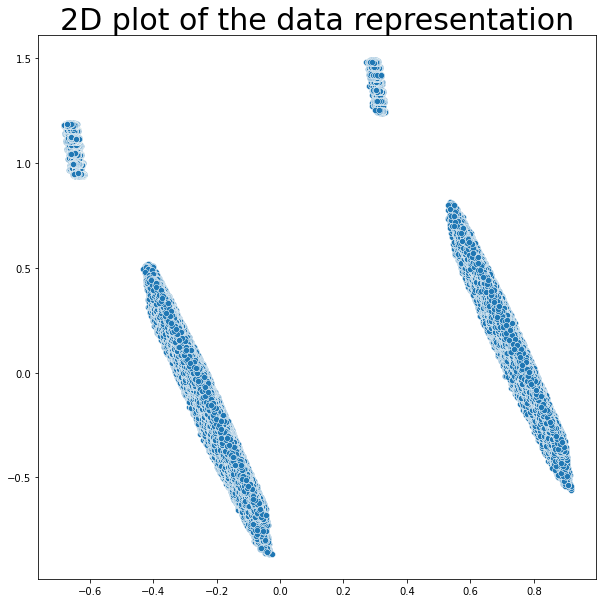

In [168]:
plt.figure(figsize=(10 ,10))
plt.title("2D plot of the data representation", fontsize=30)
sns.scatterplot(traindf[: , 0] , traindf[: , 1])

In [ ]:
# determine the best k value using kmeans

# model params
kmeans_kwargs = {"init": "random","n_init": 10,"max_iter": 300,"random_state": 42}
 # A list holds the SSE values for each k
sse = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(traindf)
    sse.append(kmeans.inertia_)
    
# plot the elbow curve
plt.plot(range(1, 20), sse)
plt.xticks(range(1, 20))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [ ]:
#step size of the mesh
#a point in mesh
h = 0.015 
# for plotting decision boundary . each will have its won color.
x_min, x_max = traindf[:, 0].min() - 1, traindf[:, 0].max() + 1
y_min, y_max = traindf[:, 1].min() - 1, traindf[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [ ]:
"""
Plotting Kmean++ and normal kmeans on clusters 3,4,5 and visuallization of the results
"""
for n_points in [3 ,4,5]:
    n_rows = 2
    n_cols = 1
    plt.figure(figsize=(30,25))
    plt.suptitle(f"Comparison of  Multiple KMEAN Clustering Algorithms with  {n_points} clusters",fontsize=40,color='r')

    selected_models = [       
        (KMeans(n_clusters=n_points), "KMeans"),
        (KMeans(n_clusters=n_points, init='k-means++'),"k-means++")
    ]

    for i, (select_model, description) in enumerate(selected_models):
        select_model.fit(traindf)
        y = select_model.predict(np.c_[xx.ravel(), yy.ravel()])
        y = y.reshape(xx.shape)
        #plot the cluster results
        plt.subplot(n_cols, n_rows, i + 1)
        plt.imshow(y, interpolation="nearest", 
                   extent=(xx.min(), xx.max(), 
                   yy.min(), yy.max()),
                   cmap=plt.cm.Paired, 
                   aspect="auto", origin="lower",
                  )
        plt.plot(traindf[:, 0], traindf[:, 1], "k.", markersize=2, alpha=0.5)


        centroids = select_model.cluster_centers_
        # set centroids shape as a X        ; set centroids color as a white
        plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", s=169, linewidths=3, color="w", zorder=10,)
        plt.title(description , fontsize=20 , color='g')
        plt.xlim(x_min, x_max)
        plt.ylim(y_min, y_max)
        plt.xticks(())
        plt.yticks(())
    plt.show()

In [ ]:
kmean3 = KMeans(n_clusters=3,init="k-means++")
kmean3.fit(traindf)
labels_3 = kmean3.labels_

# plot
plt.figure(figsize=(15 , 10))
sns.scatterplot(traindf[:, 0], traindf[:, 1] , c = labels_3 , label="n_cluster-"+str(len(set(labels_3))))
plt.title("Kmeans Clusters=3 algorithm" , fontsize =25)
plt.show()

In [ ]:
kmean4 = KMeans(n_clusters=4,init="k-means++")
kmean4.fit(traindf)
labels_4 = kmean4.labels_

# plot
plt.figure(figsize=(15 , 10))
sns.scatterplot(traindf[:, 0], traindf[:, 1] , c = labels_4 , label="n_cluster-"+str(len(set(labels_4))))
plt.title("Kmeans Cluster=4   algorithm" , fontsize =25)
plt.show()

In [ ]:
# check the data and add the labels for both cluster
df['cluster4'] = labels_4
df['cluster3'] = labels_3

In [ ]:
# check distribution for cluster 4
df.cluster4.value_counts(normalize=True)

In [ ]:
sns.countplot(df['cluster4'])
plt.title("Distribution of cluster 3 data", fontsize=19, c='r')

In [ ]:
df.cluster3.value_counts(normalize=True)

In [ ]:
# plot for clusters

sns.countplot(df['cluster3'])
plt.title("Distribution of cluster 3 data", fontsize=19, c='r')

In [ ]:
df.head()

In [ ]:
df[['CustAccountBalance','TransactionTime',"Age","TransactionAmount (INR)","TransHour", "cluster3", "cluster4"]]

In [ ]:
# query required data
required_df = df[
    ['CustAccountBalance','TransactionTime',"Age","TransactionAmount (INR)","TransHour", "cluster3", "cluster4","CustGender"]
]

In [ ]:
required_df.shape

In [ ]:
# columns to use
query_cols = ['CustAccountBalance','TransactionTime',"Age","TransactionAmount (INR)","TransHour"]

required_df.groupby('cluster3')[query_cols].mean().style.background_gradient(cmap='rainbow_r')

In [ ]:
tbl1 = required_df.groupby("cluster4").mean()[query_cols]
tbl1.style.background_gradient(cmap='Reds')

In [ ]:
required_df.groupby(['CustGender', "cluster3"]).mean()[query_cols].style.background_gradient(cmap='cividis')

In [ ]:
required_df.groupby(['CustGender', "cluster4"]).mean()[query_cols].style.background_gradient(cmap='magma')

Final Conclusion
The Average age of customers does not affect how transaction is made as the segmented groups have almost similar lar age on average.

The CLuster LAbelled 2 on the 3 cluster analysis should be considered suitably for better banking products. Majority of customers in this segment are the one whose DOB is not provided as it can be seen from the segmentation. More products on them will mean they can be encouraged to store more money and transact more.

Cluster Labelled 0 and 1 is characterised by lower amount of transactions. The bank should alos try to get feedback from people on those groups in order to identify how their services can be improved. The group might be being affected by services offered and taking feedback from them might help the bank come up with a better strategy to improve their transactions and amount they store in the bank.

This cluster analysis has helped us revealed specific characteristics and insights that will help the bank to understand their customers need and requirement so that the bank can create customized offers and custom plans to attract potential and profitable customers sell their products and services to those holding few products that will lead to higher product penetration, higher stickiness, and lower base erosion. This will empower banks to nurture by targeting specific segments with suitable products and services, thus providing a more personalized approach that might lead the bank with appropriate marketing propositions, growth, and profitability.
